In [7]:
import numpy as np
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        #dataMat: N * 3 matrix
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        #labelMat: 1 * N matrix
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [21]:
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

In [25]:
def gradAscent(dataMatIn, classLabels):
    #dataMatrix: N * 3 matrix
    dataMatrix = np.mat(dataMatIn)
    #transposed labelMat: N * 1 matrix
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    #weights: 3 * 1 matrix, 将回归为结果中的3个系数
    weights = np.ones((n, 1))
    for k in range(maxCycles):
        #h: N * 1 vector, 每个点一个归类
        h = sigmoid(dataMatrix * weights)
        #error: N * 1 vector
        error = (labelMat - h)
        #每个点一个error值， 每个feature一个weight值，即贝塔
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

In [26]:
dataArr, labelMat = loadDataSet()

In [30]:
weights = gradAscent(dataArr, labelMat)

[[1.]
 [1.]
 [1.]]


In [53]:
def plotBestFit(wei):
    import matplotlib.pyplot as plt
    #weights = wei.getA()    将numpy矩阵转换为数组
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = np.arange(-3.0, 3.0, 0.1)
    print(x)
    #这个式子计算出的，是使z值等于0，即使概率P为0.5的一系列点所在的直线
    y = (-weights[0] - weights[1] * x) / weights[2]
    print(y)
    ax.plot(x, y.transpose())
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()

[-3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01  2.66453526e-15  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00]
[[4.35102773 4.42885454 

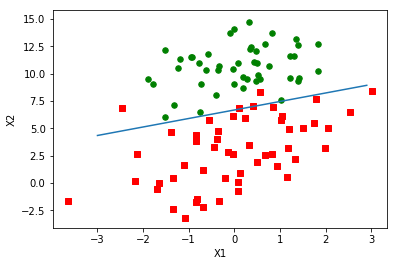

In [54]:
plotBestFit(weights.getA())

In [72]:
#5.3 stochastic gradient ascent
def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    #遍历每个点
    for i in range(m):
        #x个feature + 1个characters贡献的z
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

[-3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01  2.66453526e-15  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00]
[-4.26575652 -4.03088901

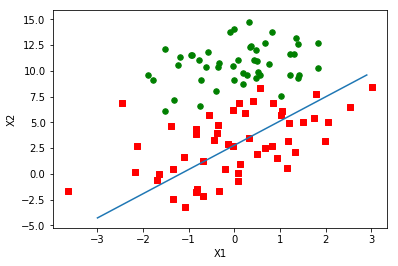

In [73]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(np.array(dataArr), labelMat)
plotBestFit(weights)

In [78]:
#modified stochastic gradient ascent
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = [i for i in range(m)]
        for i in range(m):
            #alpha changes with each iteration
            alpha = 4 / (1.0 + j + i) + 0.01
            #update vectors are randomly selected
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

[-3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01  2.66453526e-15  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00]
[5.46626377 5.51714544 5

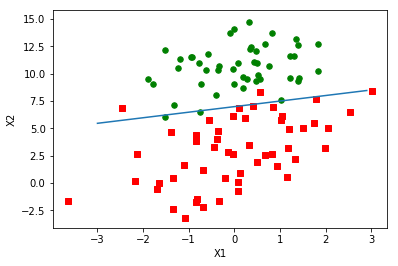

In [82]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(np.array(dataArr), labelMat, 580)
plotBestFit(weights)

In [83]:
#logistic regression classification function
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX * weights))
    if prob > 0.5: return 1.0
    else: return 0.0

In [101]:
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount) / numTestVec)
    print('the error rate of this test is: %f' % errorRate)
    return errorRate

In [102]:
def multiTest():
    numTests = 10; errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print('after %d iterations the average error rate is: %f' % (numTests, errorSum / float(numTests)))

In [103]:
multiTest()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


the error rate of this test is: 0.313433
the error rate of this test is: 0.253731
the error rate of this test is: 0.373134
the error rate of this test is: 0.373134
the error rate of this test is: 0.447761
the error rate of this test is: 0.402985
the error rate of this test is: 0.328358
the error rate of this test is: 0.298507
the error rate of this test is: 0.343284
the error rate of this test is: 0.283582
after 10 iterations the average error rate is: 0.341791
